# Comp 30760 - Python for Data Science - Project 1

Authors: Eoghan Cunningham - 16441162 & Ciaran Curran - 16942069

The following is a brief analysis of UN data.

## Importing Data

In [156]:
import pandas as pd
import numpy as np
from urllib.request import urlopen, Request
import io
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [157]:
link = "http://hdr.undp.org/sites/default/files/composite_tables/2018_Statistical_Annex_Table_1.xlsx"
request = Request(url = link, headers = {'User-Agent':'Mozilla/5.0'})
xld = urlopen(request).read()
xlds = io.BytesIO(xld)
df = pd.read_excel(xlds, index_col = False)

In [158]:
df = pd.read_excel("2018_Statistical_Annex_Table_1.xlsx",index_col = False)

### Initial Interpretations

In [159]:
#we use the head function to get a quick sense of the structure of the data
df.head()

,Table 1. Human Development Index and its components,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,SDG 3,NaN,SDG 4.3,NaN,SDG 4.6,NaN,SDG 8.5,NaN,NaN,NaN,NaN
1,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
2,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2011 PPP $),NaN,NaN,NaN,NaN
3,NaN,NaN,2017,NaN,2017,NaN,2017,a,2017,a,2017,NaN,2017,NaN,2016
4,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleanup

We see that the data is tabulated with some custom nested headers, the field names are spread across rows 3 and 4. In order to make the data more compatible the pandas dataframe structure we will remove the extraneous headings and have the data entries properly aligned. 

In [160]:
data = df[5:]

In [161]:
data = data.drop(['Unnamed: 14'], axis = 1) #we don't need two columns for HDI rank. 
data.head()

,Table 1. Human Development Index and its components,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
5,1,Norway,0.952522,NaN,82.328,NaN,17.8521,NaN,12.5668,NaN,68012.5,NaN,5,NaN
6,2,Switzerland,0.943998,NaN,83.473,NaN,16.2088,NaN,13.408,NaN,57625.1,NaN,8,NaN
7,3,Australia,0.938631,NaN,83.068,NaN,22.9213,b,12.855,NaN,43560.1,NaN,18,NaN
8,4,Ireland,0.93841,NaN,81.643,NaN,19.6137,b,12.5263,c,53754.2,NaN,8,NaN
9,5,Germany,0.936043,NaN,81.178,NaN,16.956,NaN,14.082,NaN,46135.8,NaN,13,NaN


In [162]:
headers = df.iloc[1].values.tolist()
headers

[nan,
 nan,
 'Human Development Index (HDI) ',
 nan,
 'Life expectancy at birth',
 nan,
 'Expected years of schooling ',
 nan,
 'Mean years of schooling',
 nan,
 'Gross national income (GNI) per capita',
 nan,
 'GNI per capita rank minus HDI rank',
 nan,
 'HDI rank']

In [163]:
headers[0] = "hdi_rank"
headers[1] = "country"
data.columns = headers[:14] 
#here we give a slice of the headers list as we have removed the second column for HDI rank
data.head()

We can remove any of these rows marked nan.

In [166]:
data = data.loc[:, data.columns.notnull()]
data.head()

,hdi_rank,country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
5,1,Norway,0.952522,82.328,17.8521,12.5668,68012.5,5
6,2,Switzerland,0.943998,83.473,16.2088,13.408,57625.1,8
7,3,Australia,0.938631,83.068,22.9213,12.855,43560.1,18
8,4,Ireland,0.93841,81.643,19.6137,12.5263,53754.2,8
9,5,Germany,0.936043,81.178,16.956,14.082,46135.8,13


Our dataset looks clean! However we can still count the null values.

In [167]:
data.isnull().sum()

hdi_rank                                  65
country                                    9
Human Development Index (HDI)             50
Life expectancy at birth                  50
Expected years of schooling               50
Mean years of schooling                   50
Gross national income (GNI) per capita    50
GNI per capita rank minus HDI rank        50
dtype: int64

In [168]:
data.tail(69).head(10)

,hdi_rank,country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
196,189,Niger,0.353931,60.422,5.36851,1.95133,905.868,-2
197,NaN,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN,NaN
198,..,Korea (Democratic People's Rep. of),..,71.887,12.0002,..,..,..
199,..,Monaco,..,..,..,..,..,..
200,..,Nauru,..,..,10.3143,..,18573,..
201,..,San Marino,..,..,15.1112,..,..,..
202,..,Somalia,..,56.714,..,..,..,..
203,..,Tuvalu,..,..,..,..,5887.72,..
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,Human development groups,NaN,NaN,NaN,NaN,NaN,NaN


It appears our data is still full of null values. The end of our dataset is the issue. We can remove these problematic rows by keeping only rows with numeric values for 'HDI rank'. 

In [169]:
data = data[pd.to_numeric(data['hdi_rank'], errors='coerce').notnull()]
data.isnull().sum().sum() # count the null values again

0

In [170]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.head()

,hdi_rank,country,human_development_index_hdi,life_expectancy_at_birth,expected_years_of_schooling,mean_years_of_schooling,gross_national_income_gni_per_capita,gni_per_capita_rank_minus_hdi_rank
5,1,Norway,0.952522,82.328,17.8521,12.5668,68012.5,5
6,2,Switzerland,0.943998,83.473,16.2088,13.408,57625.1,8
7,3,Australia,0.938631,83.068,22.9213,12.855,43560.1,18
8,4,Ireland,0.93841,81.643,19.6137,12.5263,53754.2,8
9,5,Germany,0.936043,81.178,16.956,14.082,46135.8,13


## Expanding

### Gender Inequality Data

Now we can expad our dataset using Gender Inequality data from another table. We can start by cleaning this data. We'll follow many of the same steps as before. 

In [171]:
link = "http://hdr.undp.org/sites/default/files/composite_tables/2018_Statistical_Annex_Table_5.xlsx"
request = Request(url = link, headers = {'User-Agent':'Mozilla/5.0'})
xld = urlopen(request).read()
xlds = io.BytesIO(xld)
df = pd.read_excel(xlds, index_col = False)
df.head(10)

,Table 5. Gender Inequality Index,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,SDG3.1,NaN,SDG3.7,NaN,SDG5.5,NaN,SDG4.6,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Gender Inequality Index,NaN,NaN,NaN,Maternal mortality ratio,NaN,Adolescent birth rate,NaN,Share of seats in parliament,NaN,Population with at least some secondary education,NaN,NaN,NaN,Labour force participation rate,NaN,NaN
3,NaN,NaN,Value,NaN,Rank,NaN,"(deaths per 100,000 live births)",NaN,"(births per 1,000 women ages 15–19)",NaN,(% held by women),NaN,(% ages 25 and older),NaN,NaN,NaN,(% ages 15 and older),NaN,NaN
4,HDI rank,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,Male,NaN,Female,NaN,Male
5,NaN,NaN,2017,NaN,2017,NaN,2015,NaN,2015-2020,b,2017,NaN,2010–2017,c,2010–2017,c,2017,NaN,2017
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Norway,0.0481388,NaN,5,NaN,5,NaN,5.592,NaN,41.4201,NaN,96.2987,NaN,95.113,NaN,60.8,NaN,67.6
8,2,Switzerland,0.0393197,NaN,1,NaN,5,NaN,2.989,NaN,29.2683,NaN,96.3714,NaN,97.1626,NaN,62.9,NaN,74.1
9,3,Australia,0.109091,NaN,23,NaN,6,NaN,12.902,NaN,32.7434,NaN,90.0339,NaN,89.9195,NaN,59.2,NaN,70.5


In [172]:
gender_inequality_data = df[7:]
gender_inequality_data.head()

,Table 5. Gender Inequality Index,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
7,1,Norway,0.0481388,NaN,5,NaN,5,NaN,5.592,NaN,41.4201,NaN,96.2987,NaN,95.113,NaN,60.8,NaN,67.6
8,2,Switzerland,0.0393197,NaN,1,NaN,5,NaN,2.989,NaN,29.2683,NaN,96.3714,NaN,97.1626,NaN,62.9,NaN,74.1
9,3,Australia,0.109091,NaN,23,NaN,6,NaN,12.902,NaN,32.7434,NaN,90.0339,NaN,89.9195,NaN,59.2,NaN,70.5
10,4,Ireland,0.109382,NaN,23,NaN,8,NaN,9.662,NaN,24.3119,NaN,90.238,NaN,86.308,NaN,53,NaN,67.3
11,5,Germany,0.0720575,NaN,14,NaN,6,NaN,6.535,NaN,31.491,NaN,96.2394,NaN,96.831,NaN,55,NaN,66.2


In [173]:
headers = df.iloc[2].values.tolist()

In [174]:
headers[0] = 'hdi_rank'
headers[1] = 'country'

In [175]:
gender_inequality_data.columns = headers
gender_inequality_data.head()

,hdi_rank,country,Gender Inequality Index,nan,nan,nan,Maternal mortality ratio,nan,Adolescent birth rate,nan,Share of seats in parliament,nan,Population with at least some secondary education,nan,nan,nan,Labour force participation rate,nan,nan
7,1,Norway,0.0481388,NaN,5,NaN,5,NaN,5.592,NaN,41.4201,NaN,96.2987,NaN,95.113,NaN,60.8,NaN,67.6
8,2,Switzerland,0.0393197,NaN,1,NaN,5,NaN,2.989,NaN,29.2683,NaN,96.3714,NaN,97.1626,NaN,62.9,NaN,74.1
9,3,Australia,0.109091,NaN,23,NaN,6,NaN,12.902,NaN,32.7434,NaN,90.0339,NaN,89.9195,NaN,59.2,NaN,70.5
10,4,Ireland,0.109382,NaN,23,NaN,8,NaN,9.662,NaN,24.3119,NaN,90.238,NaN,86.308,NaN,53,NaN,67.3
11,5,Germany,0.0720575,NaN,14,NaN,6,NaN,6.535,NaN,31.491,NaN,96.2394,NaN,96.831,NaN,55,NaN,66.2


Now we decide which columns we want to use. 

In [176]:
useful_columns = [headers[0], headers[1], headers[2], headers[6], headers[8], headers[10], headers[12], headers[16]]
useful_columns

['hdi_rank',
 'country',
 'Gender Inequality Index',
 'Maternal mortality ratio',
 'Adolescent birth rate',
 'Share of seats in parliament',
 'Population with at least some secondary education',
 'Labour force participation rate ']

We drop the other columns and any rows in our data set that do not have numeric values for HDI rank. 

In [177]:
gender_inequality_data = gender_inequality_data.loc[:, useful_columns]
gender_inequality_data = gender_inequality_data[pd.to_numeric(gender_inequality_data['hdi_rank'], errors='coerce').notnull()]
gender_inequality_data.columns = gender_inequality_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
gender_inequality_data.tail()

,hdi_rank,country,gender_inequality_index,maternal_mortality_ratio,adolescent_birth_rate,share_of_seats_in_parliament,population_with_at_least_some_secondary_education,labour_force_participation_rate
194,185,Burundi,0.470664,712,26.782,37.8049,7.5,80.2
195,186,Chad,0.708285,856,161.09,12.766,1.68351,64.8
196,187,South Sudan,..,789,62.04,26.5589,..,70.8
197,188,Central African Republic,0.673356,882,103.802,8.57143,13.16,63.3
198,189,Niger,0.648882,553,191.984,16.9591,4.28,67.5



Finally we can merge our tables on HDI rank and Country


In [178]:
data = pd.merge(data, gender_inequality_data, on=['hdi_rank','country'])
data.head()

,hdi_rank,country,human_development_index_hdi,life_expectancy_at_birth,expected_years_of_schooling,mean_years_of_schooling,gross_national_income_gni_per_capita,gni_per_capita_rank_minus_hdi_rank,gender_inequality_index,maternal_mortality_ratio,adolescent_birth_rate,share_of_seats_in_parliament,population_with_at_least_some_secondary_education,labour_force_participation_rate
0,1,Norway,0.952522,82.328,17.8521,12.5668,68012.5,5,0.0481388,5,5.592,41.4201,96.2987,60.8
1,2,Switzerland,0.943998,83.473,16.2088,13.408,57625.1,8,0.0393197,5,2.989,29.2683,96.3714,62.9
2,3,Australia,0.938631,83.068,22.9213,12.855,43560.1,18,0.109091,6,12.902,32.7434,90.0339,59.2
3,4,Ireland,0.93841,81.643,19.6137,12.5263,53754.2,8,0.109382,8,9.662,24.3119,90.238,53
4,5,Germany,0.936043,81.178,16.956,14.082,46135.8,13,0.0720575,6,6.535,31.491,96.2394,55


### Trends In Human Development Index

Now we can add some data to our table to allow us to analyse the trends/development of country's HDIs over time. 

In [179]:
link = "http://hdr.undp.org/sites/default/files/composite_tables/2018_Statistical_Annex_Table_2.xlsx"
request = Request(url = link, headers = {'User-Agent':'Mozilla/5.0'})
xld = urlopen(request).read()
xlds = io.BytesIO(xld)
df = pd.read_excel(xlds, index_col = False)
df.head()

,"Table 2. Human Development Index Trends, 1990-2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Human Development Index (HDI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Change in HDI rank,NaN,Average annual HDI growth,NaN,NaN,NaN,NaN,NaN,NaN
2,HDI rank,Country,Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,(%),NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1990,NaN,2000,NaN,2010,NaN,2012,NaN,...,NaN,2012-2017,a,1990-2000,NaN,2000-2010,NaN,2010-2017,NaN,1990-2017
4,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
HDI_by_year = df[5:]
HDI_by_year.head()

,"Table 2. Human Development Index Trends, 1990-2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
5,1,Norway,0.850055,NaN,0.916662,NaN,0.941578,NaN,0.942183,NaN,...,NaN,0,NaN,0.757228,NaN,0.268552,NaN,0.165216,NaN,0.422417
6,2,Switzerland,0.831946,NaN,0.889001,NaN,0.931986,NaN,0.935192,NaN,...,NaN,0,NaN,0.665517,NaN,0.473307,NaN,0.183109,NaN,0.469083
7,3,Australia,0.86627,NaN,0.898234,NaN,0.92303,NaN,0.928782,NaN,...,NaN,0,NaN,0.362995,NaN,0.272678,NaN,0.239731,NaN,0.297574
8,4,Ireland,0.763408,NaN,0.856646,NaN,0.909464,NaN,0.901784,NaN,...,NaN,13,NaN,1.15899,NaN,0.600099,NaN,0.448591,NaN,0.767352
9,5,Germany,0.80105,NaN,0.868406,NaN,0.920718,NaN,0.927735,NaN,...,NaN,-1,NaN,0.810623,NaN,0.586663,NaN,0.236106,NaN,0.578476


In [181]:
headers = df.iloc[2].values.tolist()
years = df.iloc[3].values.tolist()
years = list(map(lambda x: str(x), years))

In [182]:
years[0] = headers[0]
years[1] = headers[1]

In [183]:
HDI_by_year.columns = years
desired_columns = [years[0],years[1],years[2],years[4],years[6],years[8],years[10],years[12],years[14],years[16]]
desired_columns

['HDI rank',
 'Country',
 '1990',
 '2000',
 '2010',
 '2012',
 '2014',
 '2015',
 '2016',
 '2017']

In [184]:
HDI_by_year = HDI_by_year.loc[:, desired_columns]
HDI_by_year.columns = HDI_by_year.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
HDI_by_year = HDI_by_year[pd.to_numeric(HDI_by_year['hdi_rank'], errors='coerce').notnull()]
HDI_by_year.head()

,hdi_rank,country,1990,2000,2010,2012,2014,2015,2016,2017
5,1,Norway,0.850055,0.916662,0.941578,0.942183,0.945642,0.948002,0.951248,0.952522
6,2,Switzerland,0.831946,0.889001,0.931986,0.935192,0.93939,0.941886,0.943189,0.943998
7,3,Australia,0.86627,0.898234,0.92303,0.928782,0.933226,0.935633,0.937868,0.938631
8,4,Ireland,0.763408,0.856646,0.909464,0.901784,0.921118,0.929217,0.934475,0.93841
9,5,Germany,0.80105,0.868406,0.920718,0.927735,0.930015,0.932674,0.934152,0.936043


We can add this to our main dataframe once more by merging on HDI rank and Country.

In [185]:
data = pd.merge(data, HDI_by_year, on=['hdi_rank','country'])
data.head(10)

,hdi_rank,country,human_development_index_hdi,life_expectancy_at_birth,expected_years_of_schooling,mean_years_of_schooling,gross_national_income_gni_per_capita,gni_per_capita_rank_minus_hdi_rank,gender_inequality_index,maternal_mortality_ratio,...,population_with_at_least_some_secondary_education,labour_force_participation_rate,1990,2000,2010,2012,2014,2015,2016,2017
0,1,Norway,0.952522,82.328,17.8521,12.5668,68012.5,5,0.0481388,5,...,96.2987,60.8,0.850055,0.916662,0.941578,0.942183,0.945642,0.948002,0.951248,0.952522
1,2,Switzerland,0.943998,83.473,16.2088,13.408,57625.1,8,0.0393197,5,...,96.3714,62.9,0.831946,0.889001,0.931986,0.935192,0.93939,0.941886,0.943189,0.943998
2,3,Australia,0.938631,83.068,22.9213,12.855,43560.1,18,0.109091,6,...,90.0339,59.2,0.86627,0.898234,0.92303,0.928782,0.933226,0.935633,0.937868,0.938631
3,4,Ireland,0.93841,81.643,19.6137,12.5263,53754.2,8,0.109382,8,...,90.238,53,0.763408,0.856646,0.909464,0.901784,0.921118,0.929217,0.934475,0.93841
4,5,Germany,0.936043,81.178,16.956,14.082,46135.8,13,0.0720575,6,...,96.2394,55,0.80105,0.868406,0.920718,0.927735,0.930015,0.932674,0.934152,0.936043
5,6,Iceland,0.934879,82.912,19.3479,12.3638,45810.2,13,0.0618811,3,...,100,72.8,0.801545,0.860064,0.891477,0.908643,0.924576,0.927391,0.93313,0.934879
6,7,"Hong Kong, China (SAR)",0.932583,84.097,16.3257,12.0381,58419.7,2,..,..,...,75.6529,54,0.78066,0.826794,0.901263,0.91114,0.923274,0.92684,0.92964,0.932583
7,7,Sweden,0.932805,82.625,17.6346,12.4261,47765.7,9,0.0435777,4,...,88.3559,60.8,0.815868,0.897267,0.905408,0.907531,0.92,0.929021,0.931584,0.932805
8,9,Singapore,0.932042,83.218,16.2,11.4747,82503.1,-6,0.0669362,10,...,76.1447,60.5,0.717984,0.819105,0.909085,0.920032,0.927561,0.929189,0.930105,0.932042
9,10,Netherlands,0.930639,82.005,18.0448,12.19,47899.8,5,0.0436475,7,...,86.378,58,0.829234,0.875558,0.910219,0.921028,0.924478,0.926355,0.928084,0.930639


Our dataset has chosen to reperesent missing values with two dots - '..'
We can replace these with numpy's Nan value, which is more standard.

In [186]:
data = data.replace('..', np.nan)
data.isnull().sum()

hdi_rank                                              0
country                                               0
human_development_index_hdi                           0
life_expectancy_at_birth                              0
expected_years_of_schooling                           0
mean_years_of_schooling                               0
gross_national_income_gni_per_capita                  0
gni_per_capita_rank_minus_hdi_rank                    0
gender_inequality_index                              29
maternal_mortality_ratio                              9
adolescent_birth_rate                                 6
share_of_seats_in_parliament                          2
population_with_at_least_some_secondary_education    24
labour_force_participation_rate                      11
1990                                                 47
2000                                                 17
2010                                                  1
2012                                            

We now have complete, clean dataset. 

In [187]:
data.to_csv("completeDataset.csv")
data.head()

,hdi_rank,country,human_development_index_hdi,life_expectancy_at_birth,expected_years_of_schooling,mean_years_of_schooling,gross_national_income_gni_per_capita,gni_per_capita_rank_minus_hdi_rank,gender_inequality_index,maternal_mortality_ratio,...,population_with_at_least_some_secondary_education,labour_force_participation_rate,1990,2000,2010,2012,2014,2015,2016,2017
0,1,Norway,0.952522,82.328,17.85206,12.56682,68012.49292,5,0.048139,5.0,...,96.29866,60.8,0.850055,0.916662,0.941578,0.942183,0.945642,0.948002,0.951248,0.952522
1,2,Switzerland,0.943998,83.473,16.20882,13.40800,57625.06971,8,0.039320,5.0,...,96.37136,62.9,0.831946,0.889001,0.931986,0.935192,0.939390,0.941886,0.943189,0.943998
2,3,Australia,0.938631,83.068,22.92125,12.85504,43560.05774,18,0.109091,6.0,...,90.03390,59.2,0.866270,0.898234,0.923030,0.928782,0.933226,0.935633,0.937868,0.938631
3,4,Ireland,0.938410,81.643,19.61374,12.52629,53754.18626,8,0.109382,8.0,...,90.23800,53.0,0.763408,0.856646,0.909464,0.901784,0.921118,0.929217,0.934475,0.938410
4,5,Germany,0.936043,81.178,16.95598,14.08202,46135.84754,13,0.072057,6.0,...,96.23937,55.0,0.801050,0.868406,0.920718,0.927735,0.930015,0.932674,0.934152,0.936043


## Data Exploration and Visualisation 

We have inlcuded some columns from the Gender Inequality table to allow for some analysis on women's health and empowerment, specifically on the relationship between women's health, women's representation in government and the wealth of a country. 

In [188]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
gender_relevant_columns = ['hdi_rank','country','gender_inequality_index','maternal_mortality_ratio','adolescent_birth_rate','share_of_seats_in_parliament','gross_national_income_gni_per_capita','population_with_at_least_some_secondary_education','labour_force_participation_rate']
gender_inequality = data.dropna(subset = ['maternal_mortality_ratio','share_of_seats_in_parliament','population_with_at_least_some_secondary_education']).filter(items = gender_relevant_columns)
gender_inequality.columns = ['hdi_rank','country','gender_inequality_index','maternal_mortality_ratio','adolescent_birth_rate','women_in_parliament','gni_per_capita','women_with_secondary_education','women_in_labour_force']

We've taken a subset of the data in the form of a data frame containing only the columns relevant to this analaysis. We have filtered any rows containing null values from this smaller dataframe. Here we are dealing with exact values and distributions and any attempt at imputing these values would only prove misleading. 

To begin exploring the relationships between these values we can use scatter plot matrices to plot our data and hopefully expose any trends or correlations. It should be noted some column titles are changed to clarify their contents and improve ledgibility of the matrices.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12305d4a8>,
      dtype=object)

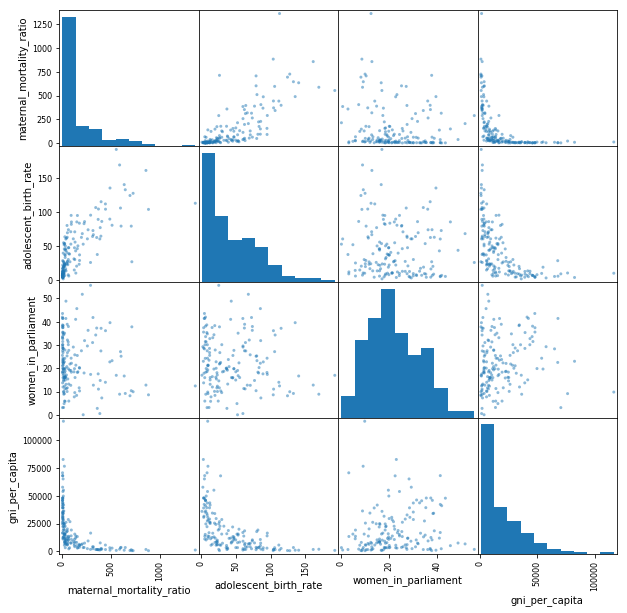

In [190]:
from pandas.plotting import scatter_matrix 
plot_columns1 = ['maternal_mortality_ratio','adolescent_birth_rate','women_in_parliament','gni_per_capita']
scatter_matrix(gender_inequality.filter(items = plot_columns1), figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ec76d8>,
      dtype=object)

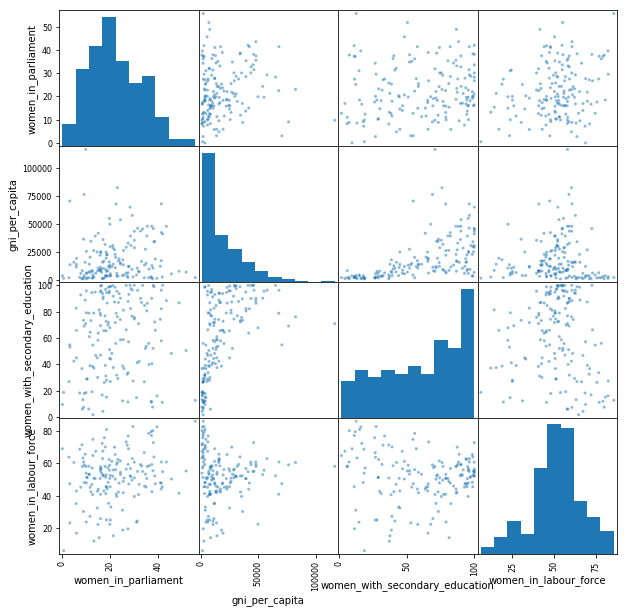

In [191]:
plot_columns2 = ['women_in_parliament','gni_per_capita','women_with_secondary_education','women_in_labour_force']
scatter_matrix(gender_inequality.filter(items = plot_columns2), figsize = (10,10))

Now we can consider some of the interesting trends. It is apparent from the first matrix that there is little correlation between the representation of women in parliament and the women's health issues. Instead we will consider women's health against the gross national income per capita.

In [192]:

trace0 = go.Scatter(
    x = gender_inequality['gni_per_capita'],
    y = gender_inequality['maternal_mortality_ratio'],
    text = gender_inequality['country'],
    mode = 'markers',
    name = 'markers'
)
layout = go.Layout(
    title= 'Country\'s Wealth plotted against Women\'s Health',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Gross National Income per Capita',
        ticklen= 5,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Deaths per 100,000 Live Births',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = dict(data=[trace0], layout=layout)
py.iplot(fig, filename='scatter-mode')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~eoghanCunn/0 or inside your plot.ly account where it is named 'scatter-mode'


It can be seen from the plot above that very wealthy countries have lower rates of maternal mortality. However it can also be seen that a high GNI is not necessarily a requirement for these lower rates. It is evident from the clustering in the lower left corner of our plot that some countries with a lower GNI are able to maintain a lower maternal mortality rate, while countries like Gabon, for example, has a rate far higher than that of the Republic of Moldova, despite having a GNI three times higher per capita.

In [193]:
gender_inequality.loc[[109,111],:]

,hdi_rank,country,gender_inequality_index,maternal_mortality_ratio,adolescent_birth_rate,women_in_parliament,gni_per_capita,women_with_secondary_education,women_in_labour_force
109,110,Gabon,0.533569,291.0,95.301,17.351598,16430.68992,65.60000,42.9
111,112,Moldova (Republic of),0.226194,23.0,21.956,22.772277,5553.85036,95.50932,39.5


Comparing Gabon and the Republic of Moldova above, illustrates that women's health is not just a luxury afforded to wealthier countries. I believe much of the scope for further analysis here, is in attempting to answer what exactly is the difference between these countries. What has allowed Moldova to achieve better standards for women in all of the fields above, despite a lesser Gross National Income and even a lower Human Development Index?

Based on the second scatter plot matrix we can see something I had not expected from the women in the labour force plot. 

In [194]:
trace0 = go.Scatter(
    x = gender_inequality['women_with_secondary_education'],
    y = gender_inequality['women_in_labour_force'],
    text = gender_inequality['country'],
    mode = 'markers',
    name = 'markers'
)
layout = go.Layout(
    title= 'Women\'s Education and Representation in the Labour Force',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Percentage of Women (older than 25) with some Secondary Education',
        ticklen= 5,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage of Women (older than 15) in the Labour Force',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = dict(data=[trace0], layout=layout)
py.iplot(fig, filename='scatter-mode')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~eoghanCunn/0 or inside your plot.ly account where it is named 'scatter-mode'


Above we see the potetially misleading nature of the 'Women in the labour force' field. The cluster to the right of the plot shows the countries with a large proportion of educated women in the labour force. These are countries that typically rank high in terms of Human Development Index: New Zealand, Switzerland, Norway, USA. However, there is plenty of dotting on the far side of our graph, where we see massive proportions of the female population in the work force, but very few receiving any secondary education. Here we see many African countries. 

This suggests that, contrary to my initial assumptions, a higher percentage of women in the labour force is not neccessarily an indicator of developed countries, where women have good access to education but could instead reperesent a neccessity in poorer, developing countries. 

In [195]:
gender_inequality.loc[[157,184,179,172],:]

,hdi_rank,country,gender_inequality_index,maternal_mortality_ratio,adolescent_birth_rate,women_in_parliament,gni_per_capita,women_with_secondary_education,women_in_labour_force
157,158,Rwanda,0.381305,290.0,25.729,55.660377,1811.223531,12.647838,86.0
184,185,Burundi,0.470664,712.0,26.782,37.804878,702.256092,7.500000,80.2
179,180,Mozambique,0.552347,489.0,135.247,39.600000,1092.688158,16.062168,82.5
172,173,Ethiopia,0.502135,353.0,62.459,37.285714,1719.378176,11.154438,77.2


Since our data is based on countries we can use the plotly library to generate a choropleth map and explore the geographic distributions of our data. We'll start by exploring how life expectancy is distributed across the globe.

In [196]:
to_plot = [ dict(
        type = 'choropleth',
        locationmode = 'country names',
        locations = data['country'],
        z = data['life_expectancy_at_birth'],
        text = data['country'],
        colorscale = [[0,"rgb(0,109,44)"],[0.35,"rgb(44,162,95)"],[0.5,"rgb(102,194,164)"],\
            [0.6,"rgb(153,216,201)"],[0.7,"rgb(204,236,230)"],[1,"rgb(237,248,251)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'life_expectancy_at_birth'),
      ) ]

layout = dict(
    title = '2017 Life Expectancy At Birth<br>Source:\
            <a href="http://hdr.undp.org/en/composite/HDI">\
            UNDP World Development Index</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=to_plot, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

It appears life expectancy is highest in western countries of the northern hemisphere, though this is not without exception as Australia, Japan, and China all have relatively high life expectancy. Most countries on the African continent do not have high life expectancy. 

In [197]:
to_plot = [ dict(
        type = 'choropleth',
        locationmode = 'country names',
        locations = data['country'],
        z = data['gross_national_income_gni_per_capita'],
        text = data['country'],
        colorscale = [[0,"rgb(37,52,148)"],[0.35,"rgb(44,127,184)"],[0.5,"rgb(65,182,196)"],\
            [0.6,"rgb(127,205,187)"],[0.7,"rgb(199,233,180)"],[1,"rgb(255,255,204)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'gross_national_income_gni_per_capita'),
      ) ]

layout = dict(
    title = '2017 Gross national income (GNI) per capita<br>Source:\
            <a href="http://hdr.undp.org/en/composite/HDI">\
            UNDP World Development Index</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=to_plot, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

Looking at the above map we see that a few outlying countries inflate the scale, making it hard to compare most countries. Keeping this in mind we filter out the top GNI countries and represent the same graph again.

In [198]:
data.loc[data['gross_national_income_gni_per_capita'] > 80000]['country'].tolist()

['Singapore', 'Liechtenstein', 'Qatar']

We notice that there are only 3 countries with a GNI above 800000.

In [199]:
df_minus = data.loc[data['gross_national_income_gni_per_capita'] < 80000]

to_plot = [ dict(
        type = 'choropleth',
        locationmode = 'country names',
        locations = df_minus['country'],
        z = df_minus['gross_national_income_gni_per_capita'],
        text = df_minus['country'],
        colorscale = [[0,"rgb(37,52,148)"],[0.35,"rgb(44,127,184)"],[0.5,"rgb(65,182,196)"],\
            [0.6,"rgb(127,205,187)"],[0.7,"rgb(199,233,180)"],[1,"rgb(255,255,204)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'gross_national_income_gni_per_capita'),
      ) ]

layout = dict(
    title = '2017 Gross national income (GNI) per capita<br>Source:\
            <a href="http://hdr.undp.org/en/composite/HDI">\
            UNDP World Development Index</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=to_plot, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

Thats better. Without those few exceptionally high GNI countries we get a better overall sense of GNI across the globe. What is interesting about this graph is that the distrubtion is very different from Life Expectancy. South america has only slighty better GNI on average than africa, yet their life expectiancy is on average significantly higher. Lets plot those two values against eachother to see how they relate. 

In [200]:

trace0 = go.Scatter(
    x = data['gross_national_income_gni_per_capita'],
    y = data['life_expectancy_at_birth'],
    text = data['country'],
    mode = 'markers',
    name = 'markers'
)
layout = go.Layout(
    title= 'Gross National Income vs Life Expectancy at Birth',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Gross National Income',
        ticklen= 5,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Life Expectancy at Birth',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = dict(data=[trace0], layout=layout)
py.iplot(fig, filename='scatter-mode')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~eoghanCunn/0 or inside your plot.ly account where it is named 'scatter-mode'


Just as I suspected. From 0 to 200000 GNI there is a very steep increase in life expectancy, rising from 55 to 75+ an increase in 20 years! After this life expectancy seems to plateau, suggesting that after a certain point GNI ceases to influence life expectancy. 

### Conclusion

Thoughout this project we have explored the United Nations Human Development data and found several correlations amongst the variables pertaining to HDI. In general, HDI across the globe is steadily increasing, however in some countries which are known to be facing war and economic sanctions HDI is decreasing. The data lends itself to further analysis which might attempt to model certain variables. This would be useful for countries which are trying to reach certain UN sustainable development goals, for example, a country trying to increase it's average life expectancy might target those variables which most affect it. Other analysis might attempt to exprolate the data to predict how long it will take for a given country to reach a certain HDI level. 

Above we have examples of some of the countries making up the upper left hand corner of our plot. We can see how they score on the few women's health issues in our table and their high scores in the Gender Inequality Index. It is apparent now that the women in the labour force numbers are somewhat misleading, or at the very least, that my own assumptions as to their implications of empowerment were wrong. 